## Using DenseNet121 Model with Imagenet trained weights 


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf 
import matplotlib.pyplot as plt
import cv2
import os
import random as random
import keras


from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D , MaxPool2D , Dense , Flatten , Dropout
from sklearn.metrics import confusion_matrix, accuracy_score
from keras.preprocessing import image
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report
from keras.preprocessing.image import ImageDataGenerator

## Data Generation from images 

In [4]:
base_dir  = "/kaggle/input/chest-xray-pneumonia/chest_xray/train"
cate = os.listdir(base_dir)

#import the filw
image_size =100
data_array = []
for i in cate:
    path_ = os.path.join(base_dir , i)   
    label = cate.index(i)
    for img_name in os.listdir(path_):
        img_path = os.path.join(path_ , img_name)
        img = cv2.imread(img_path)
        img = cv2.resize(img , (image_size , image_size))
        data_array.append([img , label])

#shuflling and splitting
np.random.shuffle(data_array)
x_train=[]
y_train=[]
for x_val , y_val in data_array:
    x_train.append(x_val)
    y_train.append(y_val)
x_train=np.array(x_train)
y_train=np.array(y_train)
del(data_array)
x_train.shape

(5216, 100, 100, 3)

In [5]:
base_dir_test = "/kaggle/input/chest-xray-pneumonia/chest_xray/test"
cate = os.listdir(base_dir_test)
data_array_test = []
for i in cate:
    path_ = os.path.join(base_dir_test , i)
    label = cate.index(i)
    for img_name in os.listdir(path_):
        img_path = os.path.join(path_ , img_name)
        img = cv2.imread(img_path)
        img = cv2.resize(img , (image_size , image_size))
        data_array_test.append([img , label])

np.random.shuffle(data_array_test)
x_test=[]
y_test=[]
for x_val , y_val in data_array_test:
    x_test.append(x_val)
    y_test.append(y_val)
x_test=np.array(x_test)
y_test=np.array(y_test)
del(data_array_test)

x_test.shape

(624, 100, 100, 3)

In [6]:
base_dir_val  = "/kaggle/input/chest-xray-pneumonia/chest_xray/val"
cate = os.listdir(base_dir_val)
data_array_val = []
for i in cate:
    path_ = os.path.join(base_dir_val , i)   
    label = cate.index(i)
    for img_name in os.listdir(path_):
        img_path = os.path.join(path_ , img_name)
        img = cv2.imread(img_path)
        img = cv2.resize(img , (image_size , image_size))
        data_array_val.append([img , label])
        
np.random.shuffle(data_array_val)
x_val=[]
y_val=[]
for x_val_ , y_val_ in data_array_val:
    x_val.append(x_val_)
    y_val.append(y_val_)
    
x_val=np.array(x_val)
y_val=np.array(y_val)
del(data_array_val)

x_val.shape


(16, 100, 100, 3)

## Using DenseNet and training model 

In [40]:
pretrained_model = tf.keras.applications.DenseNet121(input_shape=(100,100,3),include_top=False,weights='imagenet',pooling='avg')
pretrained_model.trainable = False


inputs_densenet  = pretrained_model.input
fc_l  = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
op_l = tf.keras.layers.Dense(1, activation='sigmoid')(fc_l)
model = tf.keras.Model(inputs=inputs_densenet , outputs=op_l)
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])
                                                    

In [41]:
his=model.fit(x_train, y_train, validation_data=(x_val , y_val),  steps_per_epoch=100, epochs=10,  class_weight={0:1 , 1:4})

Epoch 1/10
100/100 [==============================] - 9s 42ms/step - loss: 2.4767 - accuracy: 0.7699 - val_loss: 2.1483 - val_accuracy: 0.5000
Epoch 2/10
100/100 [==============================] - 3s 26ms/step - loss: 0.3408 - accuracy: 0.9220 - val_loss: 0.7176 - val_accuracy: 0.6875
Epoch 3/10
100/100 [==============================] - 3s 25ms/step - loss: 0.3203 - accuracy: 0.9316 - val_loss: 0.0738 - val_accuracy: 1.0000
Epoch 4/10
100/100 [==============================] - 3s 25ms/step - loss: 0.2965 - accuracy: 0.9272 - val_loss: 0.8076 - val_accuracy: 0.5625
Epoch 5/10
100/100 [==============================] - 3s 25ms/step - loss: 0.2635 - accuracy: 0.9406 - val_loss: 0.8113 - val_accuracy: 0.6250
Epoch 6/10
100/100 [==============================] - 3s 30ms/step - loss: 0.2056 - accuracy: 0.9524 - val_loss: 0.0991 - val_accuracy: 1.0000
Epoch 7/10
100/100 [==============================] - 3s 25ms/step - loss: 0.2856 - accuracy: 0.9380 - val_loss: 0.5524 - val_accuracy: 0.7500

## Predictions and Performance Evaluation

              precision    recall  f1-score   support

           0       0.85      0.94      0.90       390
           1       0.88      0.73      0.80       234

    accuracy                           0.86       624
   macro avg       0.87      0.84      0.85       624
weighted avg       0.86      0.86      0.86       624



<AxesSubplot:>

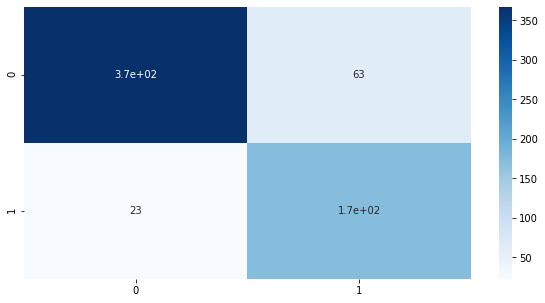

In [58]:
pred = model.predict(x_test)
pred = pred>0.5
print(classification_report(y_test,pred))
conf = confusion_matrix(pred , y_test)
plt.figure(figsize=(10,5))
sns.heatmap(conf , annot=True, cmap='Blues')

In [ ]:
\